# STUDENT PERFORMANCE
[Link data](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data) <br>
WITH TARGET VARIABLE
GradeClass: Classification of students' grades based on GPA:
* 0: 'A' (GPA >= 3.5)
* 1: 'B' (3.0 <= GPA < 3.5)
* 2: 'C' (2.5 <= GPA < 3.0)
* 3: 'D' (2.0 <= GPA < 2.5)
* 4: 'F' (GPA < 2.0)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
# def preprocessing_cat_gpa_to_numerical(gpa):
#     grades = {"F": 0,
#               "D": 1,
#               "C": 2,
#               "B": 3,
#               "A": 4}
#     return grades.get(gpa)

In [2]:
def preprocessing_GPA_to_cat(gpa):
    gpa = np.round(gpa, 1)
    if gpa >= 3.53:
        return "A"
    if 3.0 <= gpa <= 3.5:
        return "B"
    if 2.5 <= gpa < 3.0:
        return "C"
    if 2.0 <= gpa < 2.5:
        return "D"
    if gpa < 2.0:
        return "F"

In [13]:
path = "..\source_data\Student_performance_data _.csv"
df = pd.read_csv(path)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Reza\AppData\Local\Temp\ipykernel_15844\1253908735.py:1: SyntaxWarning: invalid escape sequence '\s'
  path = "..\source_data\Student_performance_data _.csv"


In [15]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


# EDA

## Undestranding data

### Check null data

In [16]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

### Check data type


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


Most type data is int64, but not necessarily is awalays numerical maybe categorical like:
* range age
* Gender (with numerical lime 0/1)

# Feature Selection

Academic Performance <br>
GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by
* **study habits**
* **parental involvement**
* **extracurricular activities**.

Study Habits
* StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
* Absences: Number of absences during the school year, ranging from 0 to 30.
* Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

Parental Involvement
ParentalSupport: The level of parental support, coded as follows:
* 0: None
* 1: Low
* 2: Moderate
* 3: High
* 4: Very High

Extracurricular Activities <br>
Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
* Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
* Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
* Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

In [18]:
df["Sports"]

0       0
1       0
2       0
3       0
4       0
       ..
2387    0
2388    1
2389    0
2390    1
2391    0
Name: Sports, Length: 2392, dtype: int64

In [19]:
def pipeline(gpa):
    gpa = preprocessing_GPA_to_cat(gpa)
    # gpa = preprocessing_cat_gpa_to_numerical(gpa)
    return gpa

In [20]:
df["GPA_Cat"] = df["GPA"].apply(pipeline)

In [21]:
df["GPA_Cat"].isnull().sum()

0

In [22]:
df["GPA_Cat"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2392 entries, 0 to 2391
Series name: GPA_Cat
Non-Null Count  Dtype 
--------------  ----- 
2392 non-null   object
dtypes: object(1)
memory usage: 18.8+ KB


In [23]:
df["GPA"]

0       2.929196
1       3.042915
2       0.112602
3       2.054218
4       1.288061
          ...   
2387    3.455509
2388    3.279150
2389    1.142333
2390    1.803297
2391    2.140014
Name: GPA, Length: 2392, dtype: float64

In [24]:
Y = df["GPA_Cat"]
X = df[
    [
        "StudyTimeWeekly",
        "Absences",
        "Tutoring",
        "ParentalSupport",
        "Sports",
        "Music",
        "Volunteering",
    ]
]

In [25]:
df["GPA_Cat"]

0       C
1       B
2       F
3       D
4       F
       ..
2387    B
2388    B
2389    F
2390    F
2391    D
Name: GPA_Cat, Length: 2392, dtype: object

In [26]:
X.columns

Index(['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Sports',
       'Music', 'Volunteering'],
      dtype='object')

### Check Distribution data

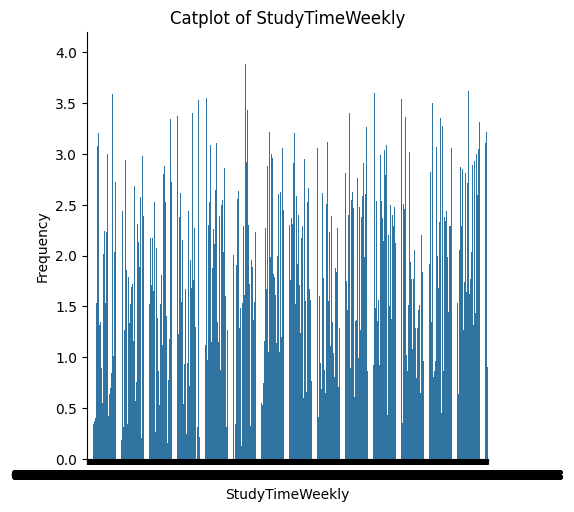

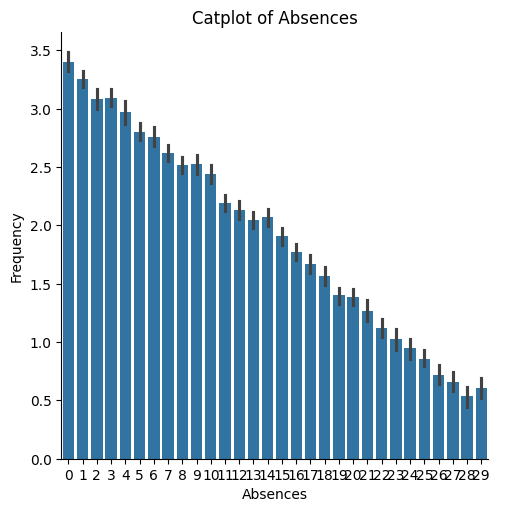

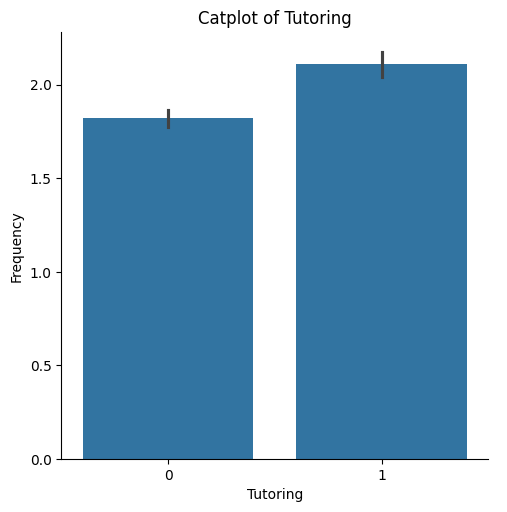

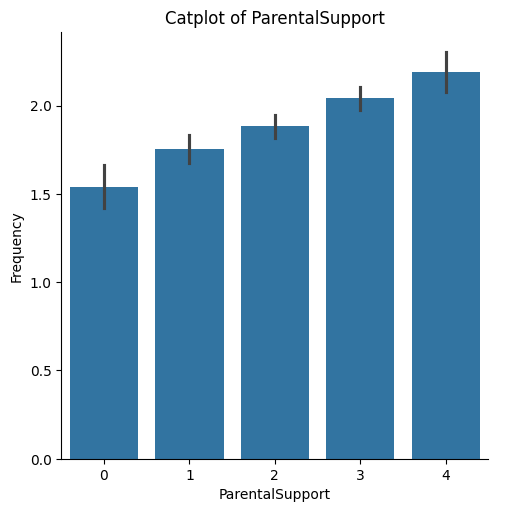

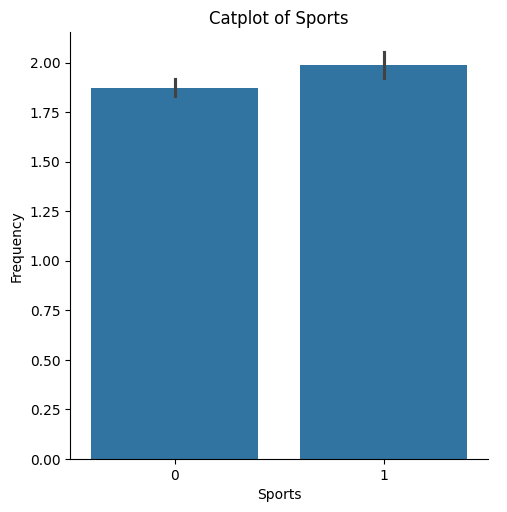

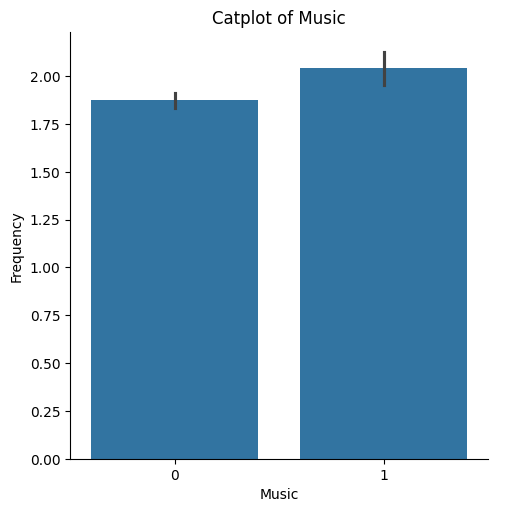

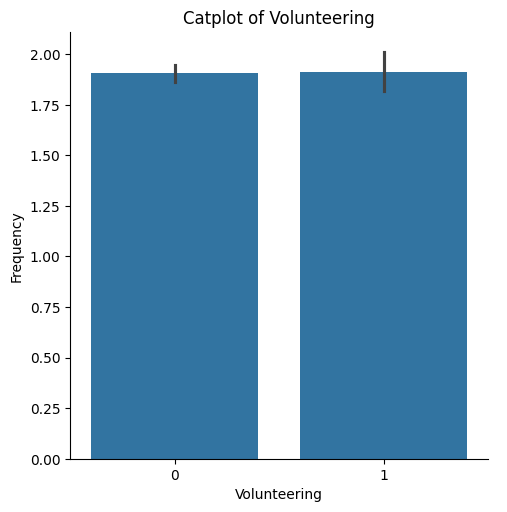

In [27]:
for target in X.columns:
    sns.catplot(data=df, x=target, y="GPA", kind="bar")
    plt.xlabel(f"{target}")
    plt.ylabel("Frequency")
    plt.title(f"Catplot of {target}")
    plt.show()

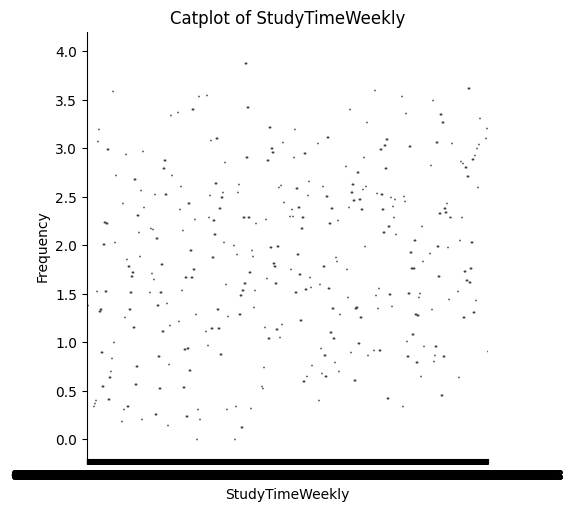

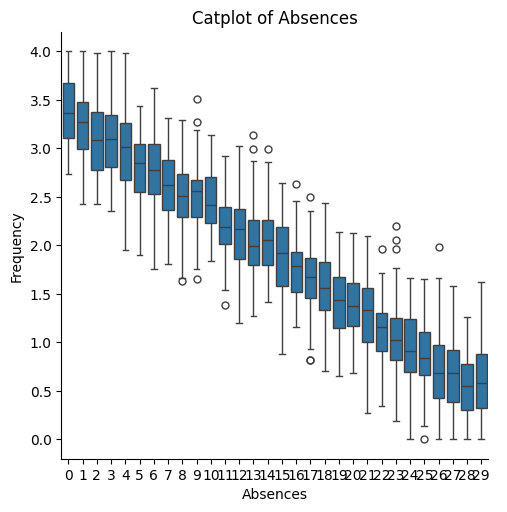

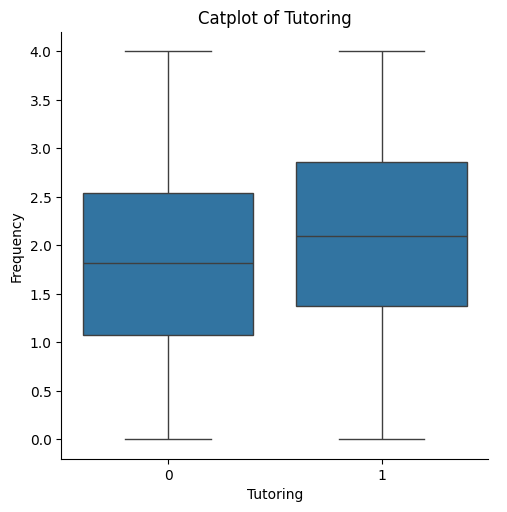

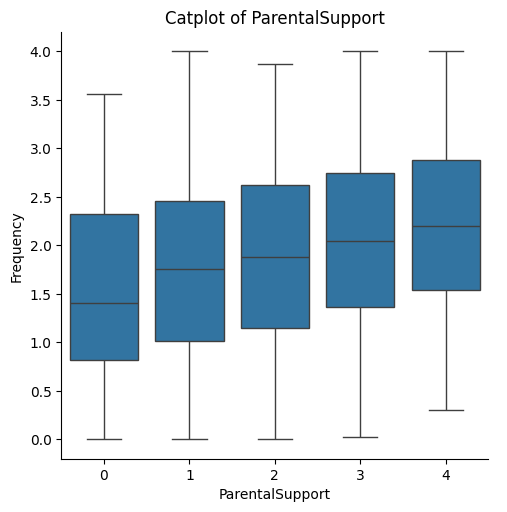

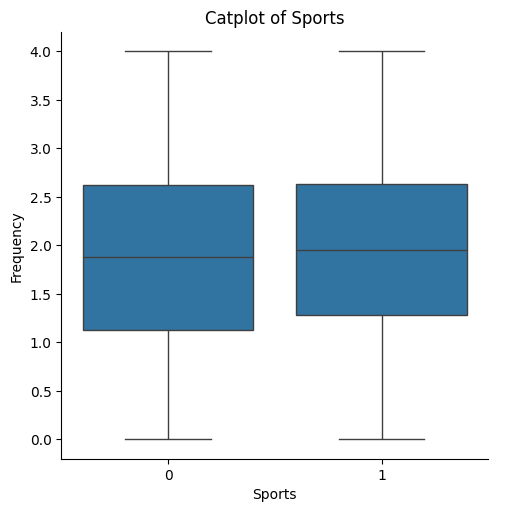

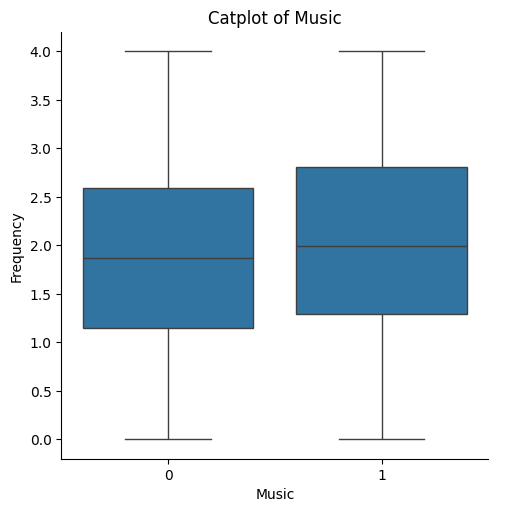

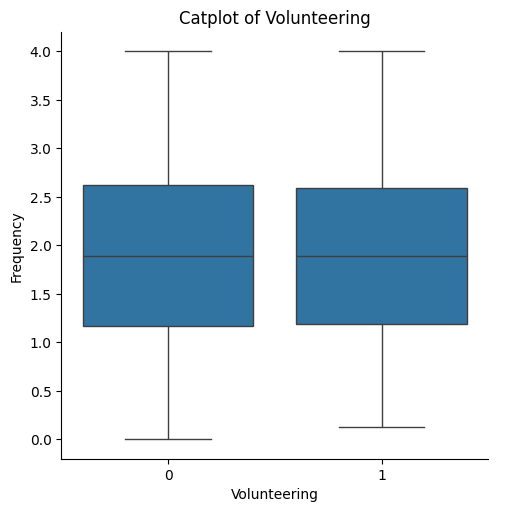

In [25]:
for target in X.columns:
    sns.catplot(data=df, x=target, y="GPA", kind="box")
    plt.xlabel(f"{target}")
    plt.ylabel("Frequency")
    plt.title(f"Catplot of {target}")
    plt.show()

The data With Selection Feature is Discrete Data

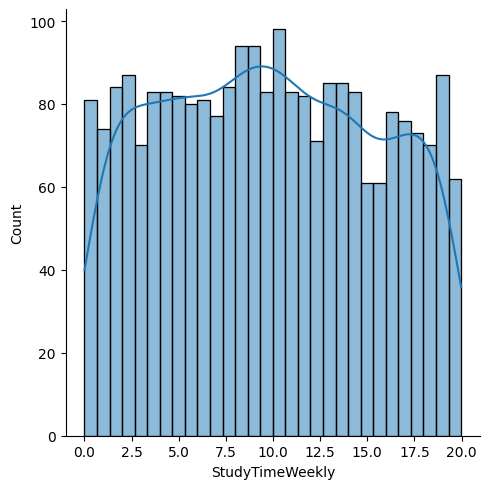

In [26]:
sns.displot(data=df, x="StudyTimeWeekly", kde=True, bins=30);

conclusion :
* StudyTimeWeekly (normal distribution)


# Modelling

## Decision tree

### Model Selection Wtih Hyperparameters

In [31]:
import numpy as np

In [32]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [33]:
parameters = {
    "criterion": ("gini", "entropy", "log_loss"),
    "max_depth": np.arange(start=1, stop=50, step=1),
    "min_samples_split": np.arange(start=2, stop=50, step=1),
}

In [34]:
tree_clf = DecisionTreeClassifier()

In [35]:
clf_random_search_decision_tree = RandomizedSearchCV(
    tree_clf, parameters, return_train_score=True, cv=5
)

In [36]:
clf_random_search_decision_tree

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy',
                                                      'log_loss'),
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   return_train_score=True)

In [37]:
clf_random_search_decision_tree.fit(X=X, y=Y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy',
                                                      'log_loss'),
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   return_train_score=True)

In [38]:
dec_tree = clf_random_search_decision_tree.fit(X=X, y=Y)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
print(
    "Generalization score with hyperparameters tuning:\n"
    f"{clf_random_search_decision_tree.cv_results_['mean_test_score'].mean():.3f} ± {clf_random_search_decision_tree.cv_results_['mean_test_score'].std():.3f}"
)

Generalization score with hyperparameters tuning:
0.747 ± 0.008


In [41]:
acc_score = []
for test in np.round(np.arange(start=0.1, step=0.1, stop=0.6), 1):
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=test, random_state=42
    )
    # clf_random_search_decision_tree.fit(X=X,y=Y)
    prediction_tree_randomsearch = clf_random_search_decision_tree.predict(X_test)
    print("\n", classification_report(y_test, prediction_tree_randomsearch))
    prediksi_benar = np.sum(prediction_tree_randomsearch == y_test)
    prediksi_salah = np.sum(prediction_tree_randomsearch != y_test)
    print(f"Total prediksi_benar test data ->{test} : {prediksi_benar}")
    print(f"Total prediksi_salah test data ->{test}: {prediksi_salah}")
    print(
        f"Score with total data train-> {len(y_train)} and data test {len(y_test)}: {clf_random_search_decision_tree.score(X_train, y_train), clf_random_search_decision_tree.score(X_test, y_test)}"
    )
    print(f"{confusion_matrix(y_test, prediction_tree_randomsearch)}")


               precision    recall  f1-score   support

           A       0.43      0.60      0.50         5
           B       0.77      0.79      0.78        34
           C       0.76      0.74      0.75        35
           D       0.66      0.53      0.58        40
           F       0.91      0.95      0.93       126

    accuracy                           0.82       240
   macro avg       0.71      0.72      0.71       240
weighted avg       0.82      0.82      0.82       240

Total prediksi_benar test data ->0.1 : 197
Total prediksi_salah test data ->0.1: 43
Score with total data train-> 2152 and data test 240: (0.8262081784386617, 0.8208333333333333)
[[  3   2   0   0   0]
 [  4  27   2   1   0]
 [  0   5  26   4   0]
 [  0   1   6  21  12]
 [  0   0   0   6 120]]

               precision    recall  f1-score   support

           A       0.56      0.45      0.50        11
           B       0.78      0.76      0.77        68
           C       0.68      0.72      0.70      

As We can see most high accuracy when train test split in 0.5
is 0.86% acc

### Evalutaion

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.5, random_state=42
)
prediction_tree_randomsearch = clf_random_search_decision_tree.predict(X_test)

In [43]:
X_test

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Sports,Music,Volunteering
1004,0.135763,17,0,2,1,1,1
196,1.989925,0,0,1,0,0,1
2342,10.588715,15,0,3,0,0,1
1708,16.208658,1,0,3,0,0,0
435,3.576821,27,0,1,1,0,0
...,...,...,...,...,...,...,...
1980,18.652914,27,1,4,1,1,1
17,3.528238,16,1,2,0,0,0
1878,11.510990,27,0,1,1,0,0
1849,7.639160,19,0,1,0,0,1


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
confusion_matrix(y_test, prediction_tree_randomsearch)

array([[ 23,   4,   1,   0,   0],
       [  6, 122,  17,   3,   0],
       [  0,  24, 144,  15,   1],
       [  0,   5,  23, 159,  19],
       [  0,   0,   1,  31, 598]], dtype=int64)

In [41]:
print(classification_report(y_test, prediction_tree_randomsearch))
prediksi_benar = np.sum(prediction_tree_randomsearch == y_test)
prediksi_salah = np.sum(prediction_tree_randomsearch != y_test)
print(f"Total prediksi_benar : {prediksi_benar}")
print(f"Total prediksi_salah : {prediksi_salah}")

              precision    recall  f1-score   support

           A       0.79      0.82      0.81        28
           B       0.79      0.82      0.81       148
           C       0.77      0.78      0.78       184
           D       0.76      0.77      0.77       206
           F       0.97      0.95      0.96       630

    accuracy                           0.87      1196
   macro avg       0.82      0.83      0.82      1196
weighted avg       0.88      0.87      0.88      1196

Total prediksi_benar : 1046
Total prediksi_salah : 150


In [42]:
clf_random_search_decision_tree.best_estimator_.feature_importances_

array([0.17047385, 0.6778776 , 0.02811891, 0.08215385, 0.01979014,
       0.01682075, 0.0047649 ])

Feature: 0, Score: 0.17047
Feature: 1, Score: 0.67788
Feature: 2, Score: 0.02812
Feature: 3, Score: 0.08215
Feature: 4, Score: 0.01979
Feature: 5, Score: 0.01682
Feature: 6, Score: 0.00476


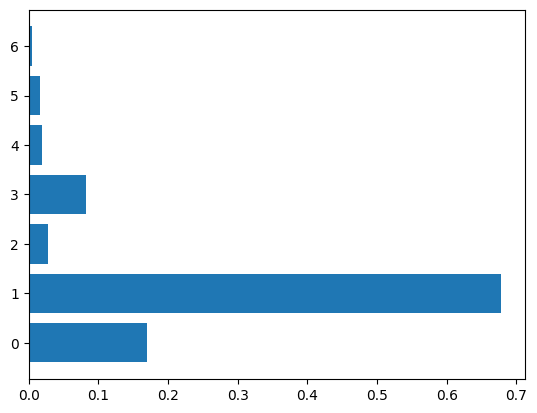

In [43]:
importance = clf_random_search_decision_tree.best_estimator_.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i, v))
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.show()

In [44]:
X.columns

Index(['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Sports',
       'Music', 'Volunteering'],
      dtype='object')

In [45]:
clf_random_search_decision_tree.best_estimator_.feature_importances_

array([0.17047385, 0.6778776 , 0.02811891, 0.08215385, 0.01979014,
       0.01682075, 0.0047649 ])

In [46]:
importances = clf_random_search_decision_tree.best_estimator_.feature_importances_

StudyTimeWeekly: 0.1705
Absences: 0.6779
Tutoring: 0.0281
ParentalSupport: 0.0822
Sports: 0.0198
Music: 0.0168
Volunteering: 0.0048


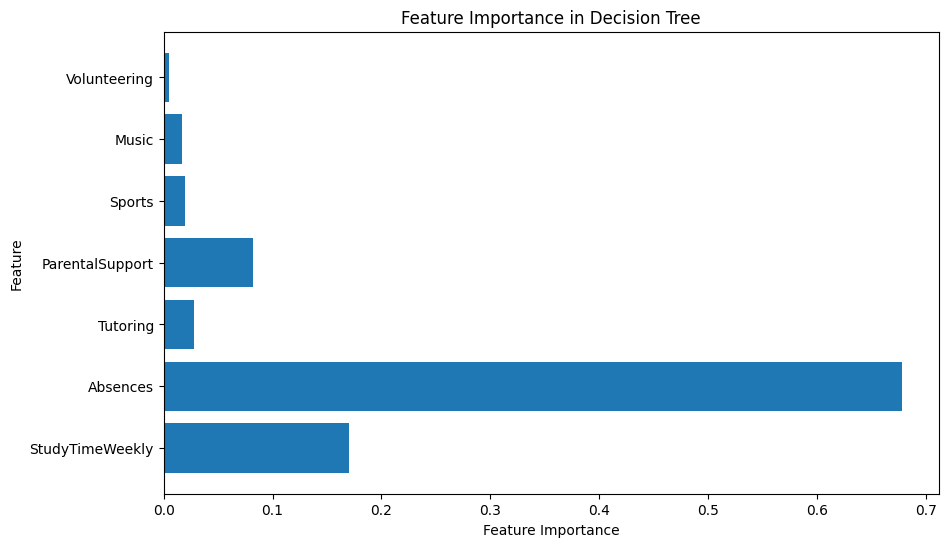

In [47]:
feature_names = X.columns
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align="center")
plt.yticks(range(len(importances)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree")
plt.show()

Feature most importance as we can see the feature is Absences

In [48]:
df_dec_tree_clf = pd.DataFrame(
    classification_report(y_test, prediction_tree_randomsearch, output_dict=True)
)

## K-nearest Neighbor

### Normalize feature **StudyTimeWeekly**

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [50]:
StudyTimeWeekly_std = X[["StudyTimeWeekly"]]

In [51]:
scaler = StandardScaler()

In [52]:
scaler_studyTimeWeekly = scaler.fit_transform(StudyTimeWeekly_std)

In [53]:
X.columns

Index(['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Sports',
       'Music', 'Volunteering'],
      dtype='object')

In [54]:
X.drop(columns=["StudyTimeWeekly"], inplace=True)

C:\Users\Reza\AppData\Local\Temp\ipykernel_4636\3189432017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['StudyTimeWeekly'],inplace=True)


In [55]:
X.head()

,Absences,Tutoring,ParentalSupport,Sports,Music,Volunteering
0,7,1,2,0,1,0
1,0,0,1,0,0,0
2,26,0,2,0,0,0
3,14,0,3,0,0,0
4,17,1,3,0,0,0


In [56]:
std_studyTimeWeekly = pd.DataFrame(
    {"std_studyTimeWeekly": scaler_studyTimeWeekly.flatten()}
)

In [57]:
X_knn_scaler = pd.concat([std_studyTimeWeekly, X], axis=1)

In [58]:
X_knn_scaler

,std_studyTimeWeekly,Absences,Tutoring,ParentalSupport,Sports,Music,Volunteering
0,1.780336,7,1,2,0,1,0
1,0.997376,0,0,1,0,0,0
2,-0.984045,26,0,2,0,0,0
3,0.045445,14,0,3,0,0,0
4,-0.902311,17,1,3,0,0,0
...,...,...,...,...,...,...,...
2387,0.160762,2,0,4,0,0,0
2388,-0.387285,4,1,4,1,0,0
2389,-0.524895,20,0,2,0,0,1
2390,0.467950,17,0,2,1,1,0


### Model Selection HyperParameter

In [59]:
parameters = {
    "n_neighbors": np.arange(start=1, stop=50, step=1),
    "metric": ("minkowski", "euclidean", "manhattan"),
    "algorithm": ("auto", "ball_tree", "kd_tree", "brute"),
    "p": np.arange(start=1, stop=3, step=1),
}

In [60]:
knn = KNeighborsClassifier()

In [61]:
clf_random_search_knn = RandomizedSearchCV(
    knn, parameters, return_train_score=True, error_score="raise", cv=5
)

In [62]:
clf_random_search_knn

RandomizedSearchCV(cv=5, error_score='raise', estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ('auto', 'ball_tree',
                                                      'kd_tree', 'brute'),
                                        'metric': ('minkowski', 'euclidean',
                                                   'manhattan'),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'p': array([1, 2])},
                   return_train_score=True)

#### Train

In [63]:
clf_random_search_knn.fit(X_knn_scaler, Y)

RandomizedSearchCV(cv=5, error_score='raise', estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ('auto', 'ball_tree',
                                                      'kd_tree', 'brute'),
                                        'metric': ('minkowski', 'euclidean',
                                                   'manhattan'),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'p': array([1, 2])},
                   return_train_score=True)

In [64]:
X_knn_scaler

,std_studyTimeWeekly,Absences,Tutoring,ParentalSupport,Sports,Music,Volunteering
0,1.780336,7,1,2,0,1,0
1,0.997376,0,0,1,0,0,0
2,-0.984045,26,0,2,0,0,0
3,0.045445,14,0,3,0,0,0
4,-0.902311,17,1,3,0,0,0
...,...,...,...,...,...,...,...
2387,0.160762,2,0,4,0,0,0
2388,-0.387285,4,1,4,1,0,0
2389,-0.524895,20,0,2,0,0,1
2390,0.467950,17,0,2,1,1,0


In [65]:
for test in np.round(np.arange(start=0.1, step=0.1, stop=0.6), 1):
    X_train, X_test, y_train, y_test = train_test_split(
        X_knn_scaler, Y, test_size=test, random_state=42
    )
    # clf_random_search_knn.fit(X_train,y_train)
    prediction_knn_randomsearch = clf_random_search_knn.predict(X_test)
    print("\n", classification_report(y_test, prediction_knn_randomsearch))
    prediksi_benar = np.sum(prediction_knn_randomsearch == y_test)
    prediksi_salah = np.sum(prediction_knn_randomsearch != y_test)
    print(f"Total prediksi_benar test data ->{test} : {prediksi_benar}")
    print(f"Total prediksi_salah test data ->{test}: {prediksi_salah}")
    print(
        f"Score with total data train-> {len(y_train)} and data test {len(y_test)}: {clf_random_search_knn.score(X_train, y_train), clf_random_search_knn.score(X_test, y_test)}"
    )
    print(f"{confusion_matrix(y_test, prediction_knn_randomsearch)}")


               precision    recall  f1-score   support

           A       1.00      0.20      0.33         5
           B       0.79      0.79      0.79        34
           C       0.72      0.80      0.76        35
           D       0.71      0.50      0.59        40
           F       0.88      0.97      0.92       126

    accuracy                           0.82       240
   macro avg       0.82      0.65      0.68       240
weighted avg       0.82      0.82      0.81       240

Total prediksi_benar test data ->0.1 : 198
Total prediksi_salah test data ->0.1: 42
Score with total data train-> 2152 and data test 240: (0.7941449814126395, 0.825)
[[  1   4   0   0   0]
 [  0  27   6   1   0]
 [  0   3  28   4   0]
 [  0   0   4  20  16]
 [  0   0   1   3 122]]

               precision    recall  f1-score   support

           A       1.00      0.09      0.17        11
           B       0.76      0.71      0.73        68
           C       0.60      0.72      0.66        72
        

In [66]:
clf_random_search_knn.best_estimator_

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=41)

In [67]:
clf_random_search_knn.best_params_

{'p': 2, 'n_neighbors': 41, 'metric': 'manhattan', 'algorithm': 'brute'}

In [68]:
print("score : ", clf_random_search_knn.best_score_)

score :  0.785126789598274


In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X_knn_scaler, Y, test_size=0.1, random_state=42
)

#### Evaluation

In [70]:
prediction = clf_random_search_knn.predict(X_test)

In [71]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           A       1.00      0.20      0.33         5
           B       0.79      0.79      0.79        34
           C       0.72      0.80      0.76        35
           D       0.71      0.50      0.59        40
           F       0.88      0.97      0.92       126

    accuracy                           0.82       240
   macro avg       0.82      0.65      0.68       240
weighted avg       0.82      0.82      0.81       240



In [72]:
df_knn_eval_hyper_random_search = pd.DataFrame(
    classification_report(y_test, prediction, output_dict=True)
)

In [73]:
clf_random_search_knn.best_params_

{'p': 2, 'n_neighbors': 41, 'metric': 'manhattan', 'algorithm': 'brute'}

### Elbow method find best K-value Using best Parameter and not using best param K value

In [74]:
error_rate = []
# Will take some time
for i in range(1, 33):
    knn = KNeighborsClassifier(
        n_neighbors=i, metric="manhattan", algorithm="brute", p=2
    )
    knn.fit(X_train, y_train)
    #  clf_random_search_knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

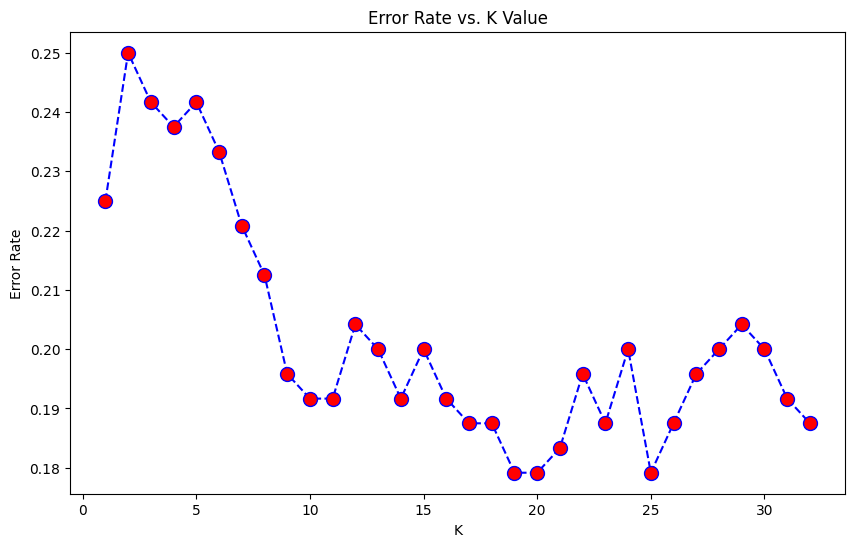

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 33),
    error_rate,
    color="blue",
    linestyle="dashed",
    marker="o",
    markerfacecolor="red",
    markersize=10,
)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

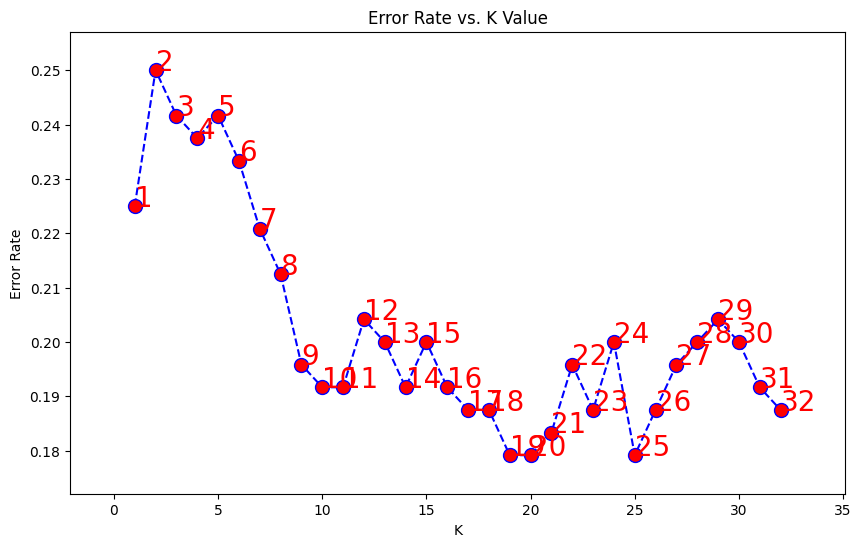

In [76]:
xs = range(1, 33)
ys = error_rate
plt.figure(figsize=(10, 6))
plt.plot(
    xs,
    ys,
    color="blue",
    linestyle="dashed",
    marker="o",
    markerfacecolor="red",
    markersize=10,
)
for x, y in zip(xs, ys):
    plt.text(x, y, str(x), color="red", fontsize=20)
    plt.title("Error Rate vs. K Value")
    plt.xlabel("K")
    plt.ylabel("Error Rate")
plt.margins(0.1)
plt.show()

#### Train

Conclusion best K-value is k = 25

In [77]:
clf_random_search_knn.best_params_

{'p': 2, 'n_neighbors': 41, 'metric': 'manhattan', 'algorithm': 'brute'}

In [78]:
knn_best = KNeighborsClassifier(
    n_neighbors=25, metric="manhattan", algorithm="brute", p=2
)

In [79]:
knn_best.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=25)

In [80]:
knn_best.effective_metric_params_

{}

#### Evaluation

In [81]:
pred_i = knn_best.predict(X_test)

In [82]:
pred_i_proba = knn_best.predict_proba(X_test)

In [83]:
print(classification_report(y_test, pred_i))

              precision    recall  f1-score   support

           A       1.00      0.40      0.57         5
           B       0.79      0.79      0.79        34
           C       0.72      0.74      0.73        35
           D       0.69      0.50      0.58        40
           F       0.88      0.97      0.92       126

    accuracy                           0.82       240
   macro avg       0.82      0.68      0.72       240
weighted avg       0.81      0.82      0.81       240



In [84]:
df_knn_K_non_best_params_ = pd.DataFrame(
    classification_report(y_test, pred_i, output_dict=True)
)

In [85]:
proba_df = pd.DataFrame(pred_i_proba * 100, columns=knn_best.classes_)

proba_df["actual"] = y_test.reset_index(drop=True)

proba_df["predicted_proba"] = pred_i

In [86]:
proba_df

,A,B,C,D,F,actual,predicted_proba
0,0.0,0.0,4.0,4.0,92.0,F,F
1,0.0,48.0,44.0,8.0,0.0,B,B
2,0.0,0.0,0.0,44.0,56.0,D,F
3,20.0,76.0,4.0,0.0,0.0,B,B
4,0.0,0.0,0.0,0.0,100.0,F,F
...,...,...,...,...,...,...,...
235,0.0,12.0,44.0,36.0,8.0,C,C
236,0.0,0.0,0.0,0.0,100.0,F,F
237,0.0,0.0,0.0,0.0,100.0,F,F
238,0.0,24.0,68.0,8.0,0.0,C,C


In [87]:
prediction_df = pd.DataFrame({"prediction": pred_i})

In [88]:
pd.concat([X_test, prediction_df], axis=1, join="inner")

,std_studyTimeWeekly,Absences,Tutoring,ParentalSupport,Sports,Music,Volunteering,prediction
196,-1.376969,0,0,1,0,0,1,F
134,1.692500,5,1,2,0,0,0,F
229,-0.961801,2,0,3,1,0,0,D
56,-1.566038,20,0,2,1,1,0,D
179,0.962083,1,0,3,0,0,1,F
111,-0.725786,2,1,4,0,1,0,F
44,1.618928,1,1,3,1,0,0,F
100,-0.662268,23,1,1,1,0,1,F
239,0.193950,16,0,1,0,1,0,F
173,1.599692,9,0,2,1,0,0,F


# Comparison

In [89]:
df_knn_K_non_best_params_

,A,B,C,D,F,accuracy,macro avg,weighted avg
precision,1.000000,0.794118,0.722222,0.689655,0.877698,0.820833,0.816739,0.814391
recall,0.400000,0.794118,0.742857,0.500000,0.968254,0.820833,0.681046,0.820833
f1-score,0.571429,0.794118,0.732394,0.579710,0.920755,0.820833,0.719681,0.811227
support,5.000000,34.000000,35.000000,40.000000,126.000000,0.820833,240.000000,240.000000


In [90]:
df_knn_eval_hyper_random_search

,A,B,C,D,F,accuracy,macro avg,weighted avg
precision,1.000000,0.794118,0.717949,0.714286,0.884058,0.825,0.822082,0.821212
recall,0.200000,0.794118,0.800000,0.500000,0.968254,0.825,0.652474,0.825000
f1-score,0.333333,0.794118,0.756757,0.588235,0.924242,0.825,0.679337,0.813071
support,5.000000,34.000000,35.000000,40.000000,126.000000,0.825,240.000000,240.000000


In [91]:
df_dec_tree_clf

,A,B,C,D,F,accuracy,macro avg,weighted avg
precision,0.793103,0.787097,0.774194,0.764423,0.967638,0.874582,0.817291,0.876448
recall,0.821429,0.824324,0.782609,0.771845,0.949206,0.874582,0.829883,0.874582
f1-score,0.807018,0.805281,0.778378,0.768116,0.958333,0.874582,0.823425,0.875403
support,28.000000,148.000000,184.000000,206.000000,630.000000,0.874582,1196.000000,1196.000000


Decision tree highest accuracy score

# Deployment

In [92]:
import pickle

In [97]:
pickle.dump(dec_tree, open("..\model\model_tree.pkl", "wb"))

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Reza\AppData\Local\Temp\ipykernel_4636\1070824348.py:1: SyntaxWarning: invalid escape sequence '\m'
  pickle.dump(dec_tree,open("..\model\model_tree.pkl","wb"))
